# Figure 4: First authors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import plot_info # Does this set the plot style ? Yes it does
import wrangling

assessment_columns = plot_info.assessment_columns

first_author_claims = pd.read_csv("preprocessed_data/first_author_claims.csv")

author_metrics = wrangling.create_author_metric(claim_df=first_author_claims, variable='first_author_key', other_col={"Name":('Name', 'first')})

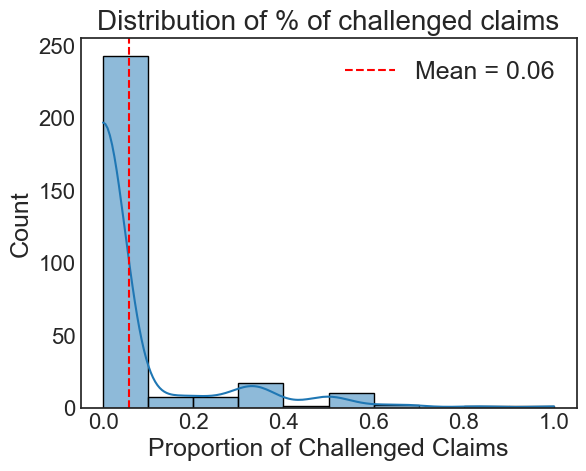

Descriptive Statistics:


,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop,Challenged prop,Articles,Major claims
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,0.820069,2.079585,0.249135,0.041522,0.238754,0.259369,0.602996,0.070079,0.009073,0.058483,0.058483,1.363322,3.429066
std,1.125222,1.727202,0.513912,0.246516,0.652256,0.344167,0.367580,0.160911,0.057098,0.153144,0.153144,0.694350,1.970966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,7.000000,11.000000,2.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,5.000000,14.000000


In [2]:
descriptive_stats = author_metrics[assessment_columns + [col + ' prop' for col in assessment_columns] + 
                    ['Challenged prop', 'Articles', 'Major claims']].describe()

sns.histplot(author_metrics['Challenged prop'], kde=True)
plt.title('Distribution of % of challenged claims')
plt.xlabel('Proportion of Challenged Claims')
plt.axvline(author_metrics['Challenged prop'].mean(), color='red', linestyle='--', 
            label=f'Mean = {author_metrics["Challenged prop"].mean():.2f}')
plt.legend()
plt.show()
print("Descriptive Statistics:")
descriptive_stats

## A. Distribution plot

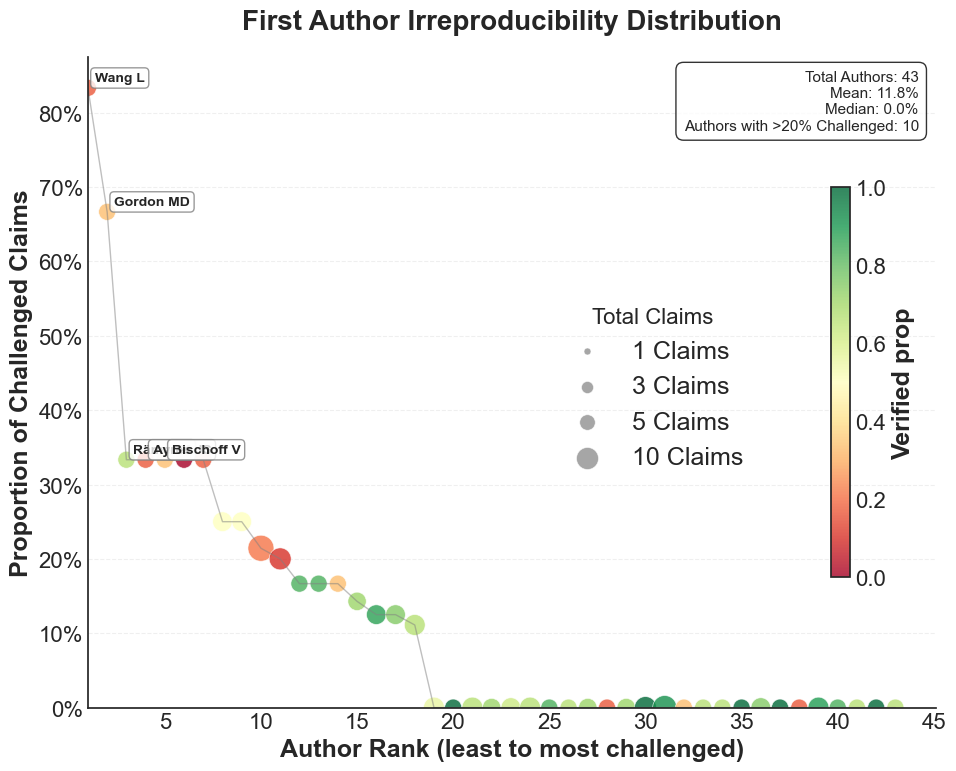

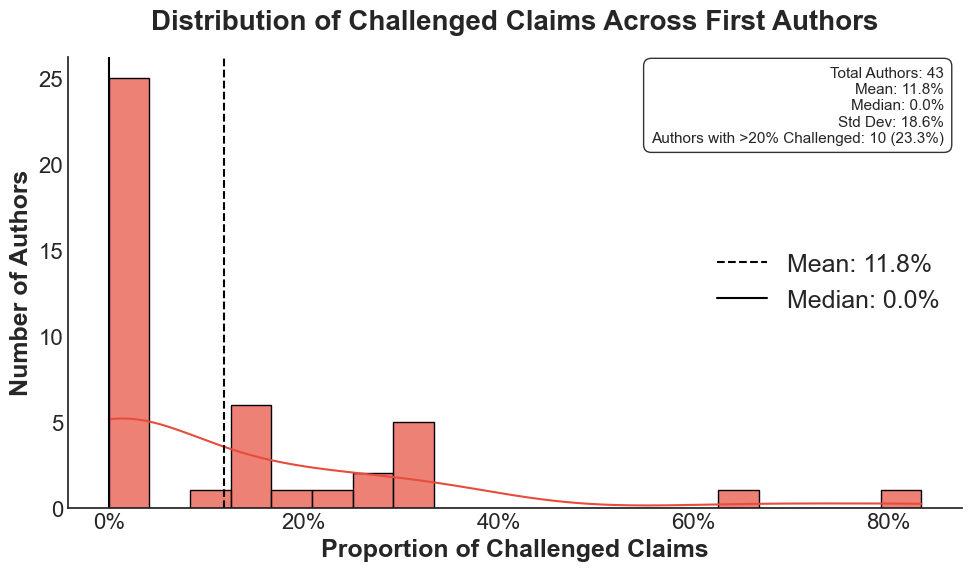

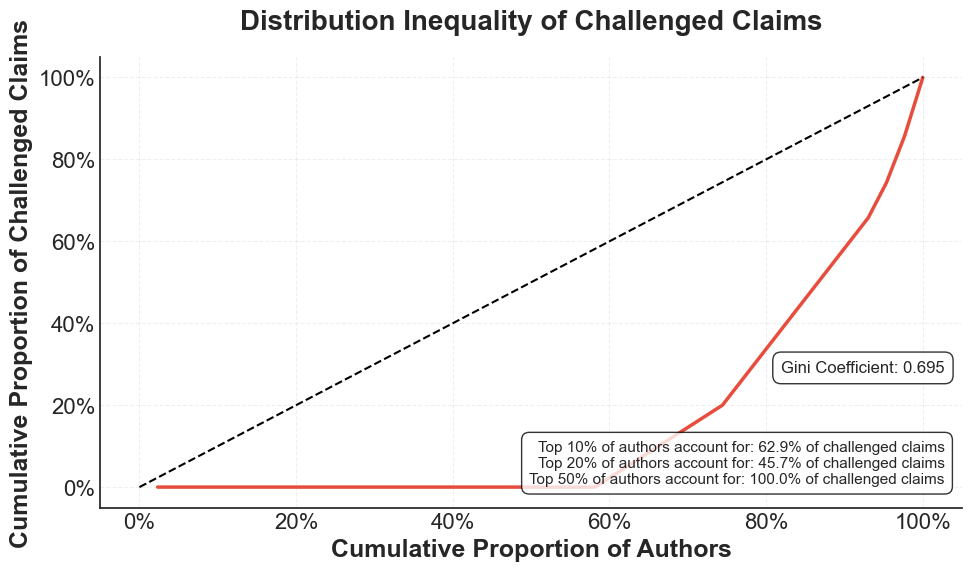

In [3]:
to_plot = author_metrics.copy()
to_plot = to_plot[to_plot['Articles'] >= 2]
to_plot = to_plot[to_plot['Major claims'] >= 6]

fig, ax = plot_info.plot_author_irreproducibility_focused(
    df=to_plot,
    title="First Author Irreproducibility Distribution",
    color_by='Verified prop',
    cmap='RdYlGn',  # Choose colormap that doesn't have white at minimum
    most_challenged_on_right=True
)
plt.savefig('figures/fig4A-V1.png', dpi=300, bbox_inches='tight')
fig1, ax1 = plot_info.plot_challenged_histogram(to_plot)
plt.savefig('figures/fig4A-V2.png', dpi=300, bbox_inches='tight')

# Create Lorenz curve visualization
fig2, ax2 = plot_info.plot_lorenz_curve(to_plot)
plt.savefig('figures/fig4A-V3.png', dpi=300, bbox_inches='tight')

## B. Binary variables

In [4]:
first_author_claims.columns

Index(['id', 'id.1', 'content', 'article_id', 'rank', 'pmid', 'authors_txt',
       'title', 'pmid_article', 'volume', 'issue', 'abstract', 'year',
       'journal_name', 'impact_factor', 'first_author_extracted',
       'last_author_extracted', 'primary_affiliation', 'country',
       'assertion_type', 'label', 'is_assessed', 'assessment_type',
       'rank_assessment_type', 'assessment_type_grouped', 'author_id', 'name',
       'sex', 'leading_author', 'first_author', 'career_stage',
       'expertise_level', 'author_key', 'Sex', 'PhD Post-doc', 'current job',
       'MD', 'Affiliation', 'Country', 'Ivy league', 'Name', 'Become a Pi',
       'first_author_key', 'ignore_for_become_a_pi', 'Is a PI', 'Career Stage',
       'Become a PI that counts'],
      dtype='object')

Summary of PhD Post-doc:
              Major claims  Articles  Verified_prop  Challenged_prop  \
PhD Post-doc                                                           
PhD                    560       223       0.589286         0.069643   
Post-doc               318       125       0.632075         0.069182   

              Unchallenged_prop  
PhD Post-doc                     
PhD                    0.241071  
Post-doc               0.238994  
Index(['PhD', 'Post-doc'], dtype='object', name='PhD Post-doc')
Summary of Is a PI:
         Major claims  Articles  Verified_prop  Challenged_prop  \
Is a PI                                                           
False             962       381       0.603950         0.068607   
True               29        13       0.689655         0.103448   

         Unchallenged_prop  
Is a PI                     
False             0.241164  
True              0.172414  
Index([False, True], dtype='bool', name='Is a PI')
Summary of Career Stage:
     

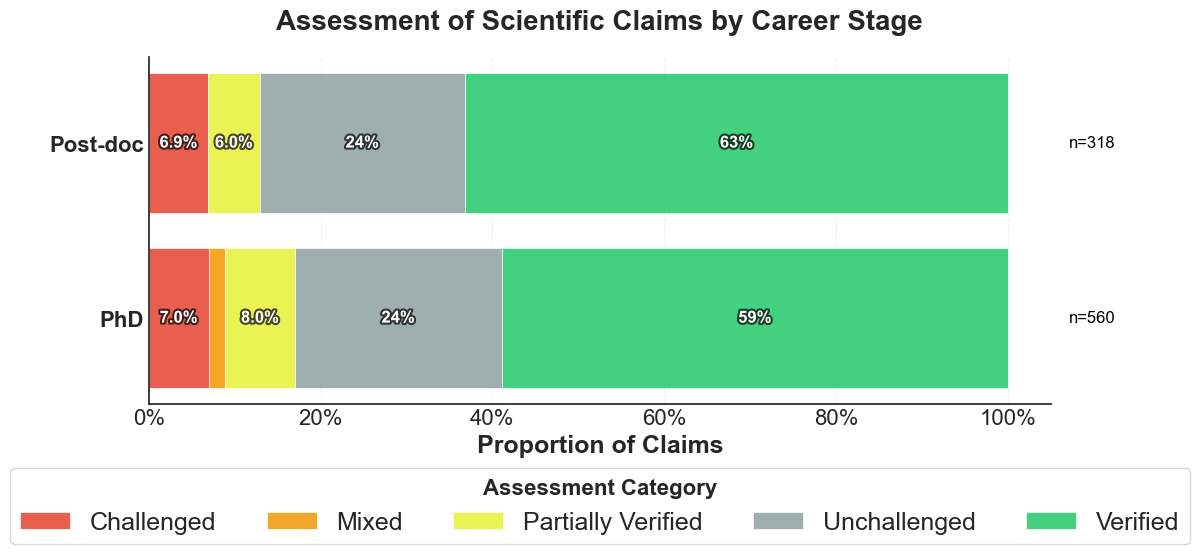

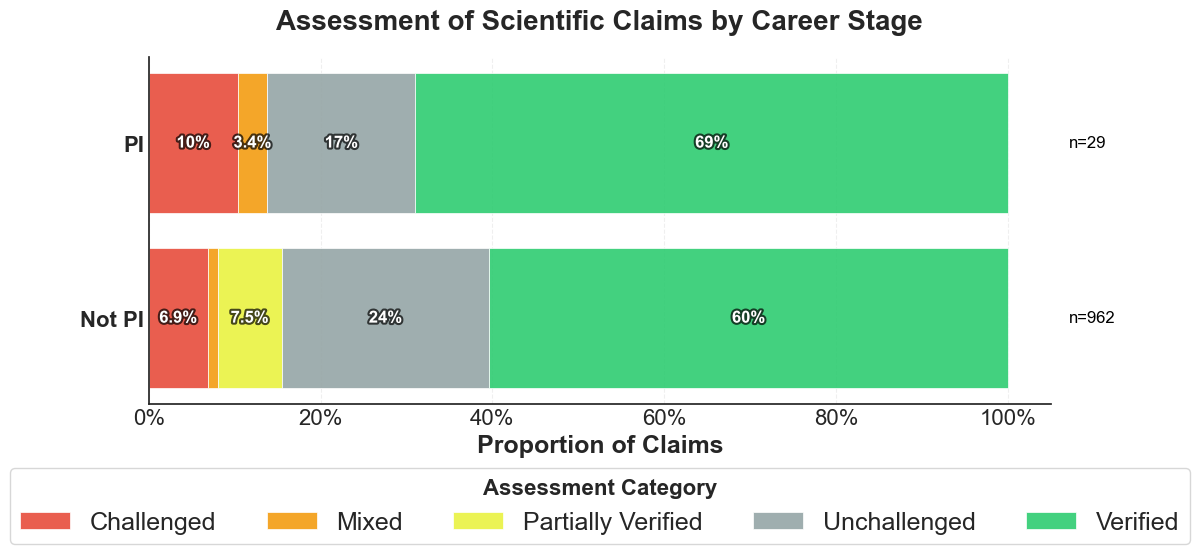

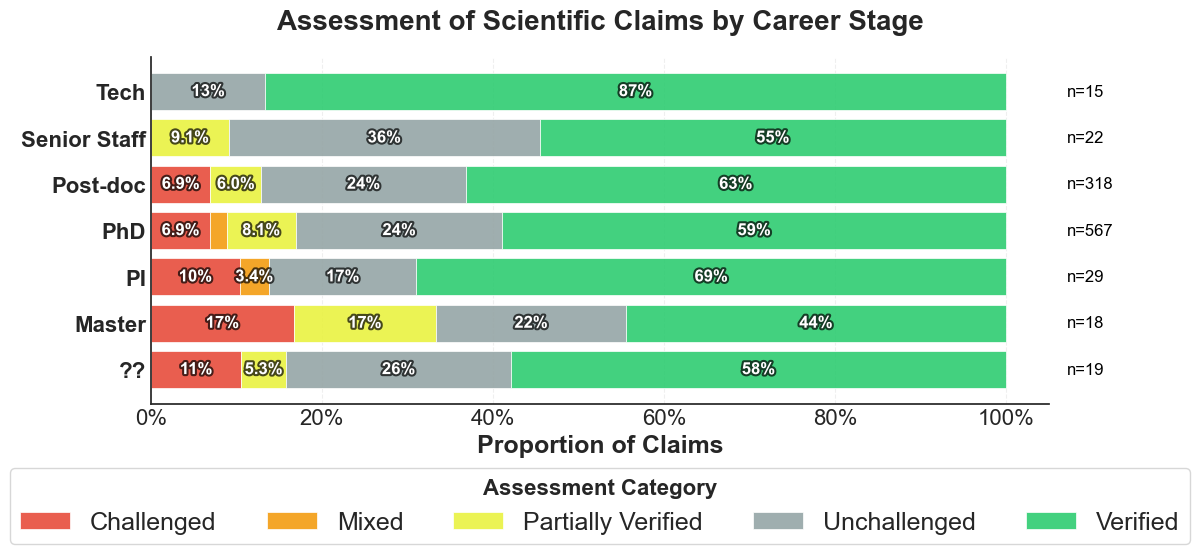

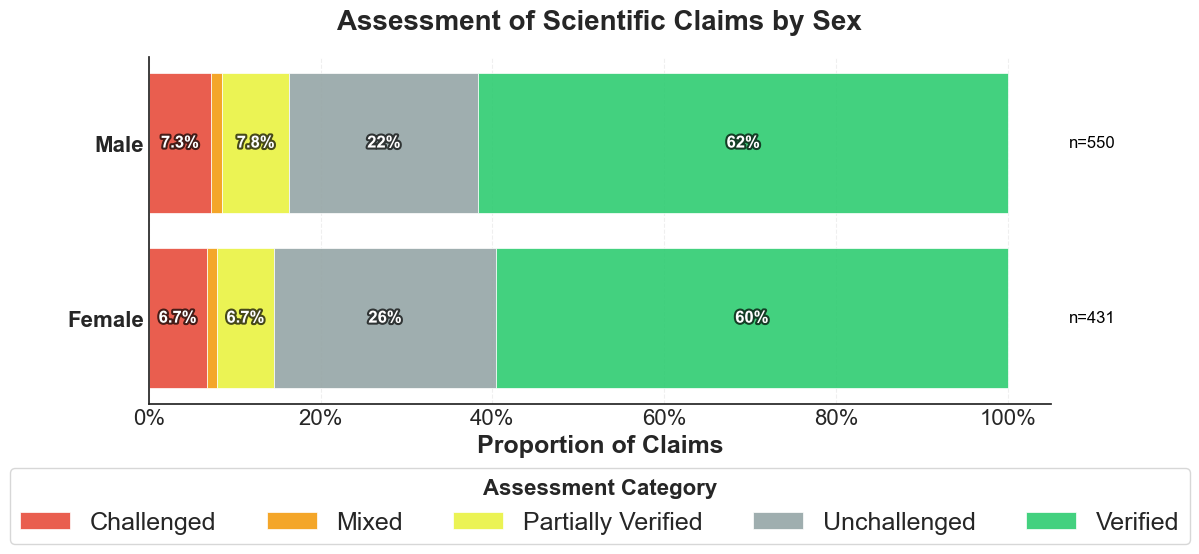

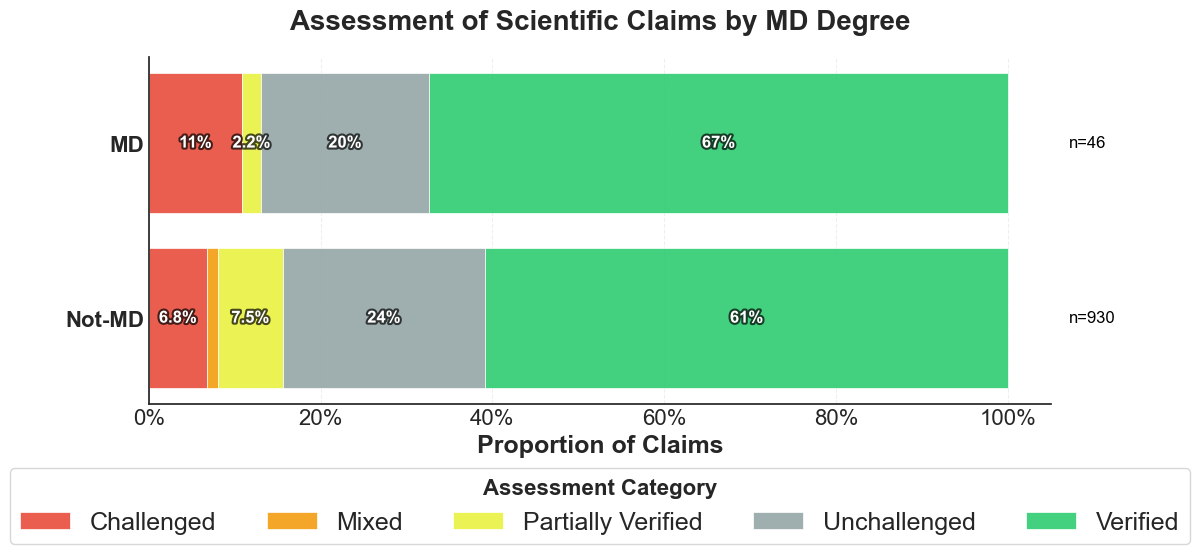

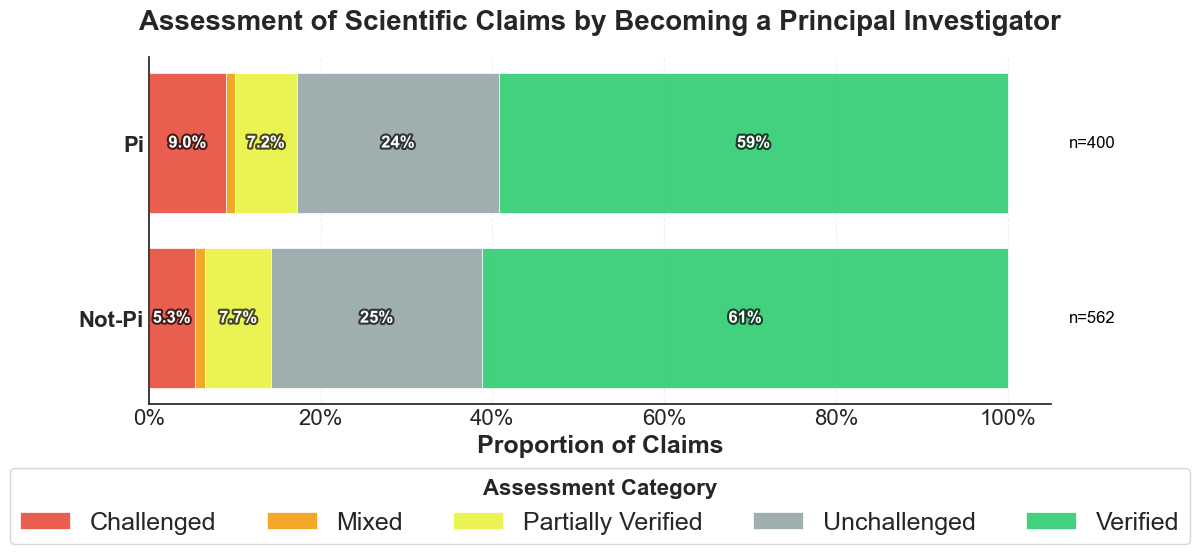

In [5]:
all_categorical_variables = {
            "PhD Post-doc": {
                "labels": ['PhD', 'Post-doc'],
                "title": "Assessment of Scientific Claims by Career Stage",
                "fig_name_prefix" : "fig4B_"
                },
            "Is a PI": {
                "labels": ['Not PI', 'PI'],
                "title": "Assessment of Scientific Claims by Career Stage",
                "fig_name_prefix" : "fig4B_"
                },
            "Career Stage": {
                "labels": first_author_claims["Career Stage"].unique(),
                "title": "Assessment of Scientific Claims by Career Stage",
                "fig_name_prefix" : "fig4B_"
                },
            "Sex": {
                "labels": ["Female", "Male"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by Sex",
                "fig_name_prefix" : "fig4B_"
            },
            "MD": {
                "labels": ["Not-MD", "MD"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by MD Degree",
                "fig_name_prefix" : "fig4B_"
            },
            "Become a PI that counts": {
                "labels": ["Not-Pi", "Pi"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by Becoming a Principal Investigator",
                "fig_name_prefix" : "fig4B_"
            }
}


for variable in all_categorical_variables.keys():
    # This was wrong because it overcounted claims when an author had different values for the same variable Utiliser pour les 2025-04-09
    # var_grouped = plot_info.prepare_categorical_variable_data(first_author_claims, author_metrics, variable, 
    #                                                 key_col='first_author_key',
    #                                                 assessment_columns=assessment_columns)
    
    var_grouped = wrangling.create_author_metric(claim_df = first_author_claims, 
                                        variable= variable,
                                        other_col={"Name":('Name', 'first')}).set_index(variable)
    
    explain_df = first_author_claims.groupby(["Name", variable]).agg(**{
        "Major claims":('id', 'count'),
        "Articles":('article_id', 'nunique')
        },
    ).reset_index().pivot(index="Name", columns=variable, values="Major claims")
    explain_df.to_csv(f"figures/{all_categorical_variables[variable]['fig_name_prefix']}categorical_{variable}.csv", index=True, index_label=f"Name/{variable}")


    # Calculate proportions
    for col in assessment_columns:
        var_grouped[f'{col}_prop'] = var_grouped[col] / var_grouped['Major claims']

    print(f"Summary of {variable}:")
    print(var_grouped[['Major claims', 'Articles', 
                        'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])
    print(var_grouped.index)
    
    labels=all_categorical_variables[variable]["labels"]
    if variable == "Career Stage":
        # Use the labels from the data
        labels = var_grouped.index

    fig, ax = plot_info.create_horizontal_bar_chart(var_grouped, show_p_value=False, labels=labels, title=all_categorical_variables[variable]["title"])
    plt.savefig(f"figures/{all_categorical_variables[variable]['fig_name_prefix']}categorical_{variable}.png", dpi=300, bbox_inches='tight')


In [6]:
to_plot = author_metrics.copy()

/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_19786/2257522897.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = to_plot.groupby('Article_bin')['Challenged prop'].median()


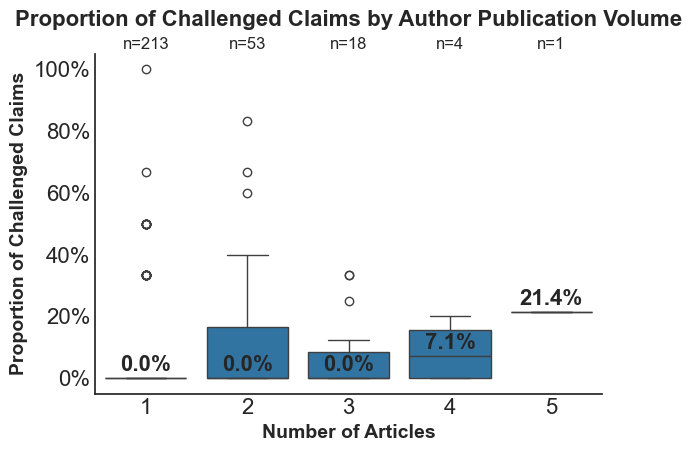

In [7]:

# Create article count bins
article_bins = [.5, 1.5, 2.5, 3.5, 4.5,  float('inf')]
bin_labels =     ['1', '2', '3', '4', '5']
to_plot['Article_bin'] = pd.cut(to_plot['Articles'], bins=article_bins, labels=bin_labels)

# Create the boxplot
ax = sns.boxplot(x='Article_bin', y='Challenged prop', data=to_plot)
#ax = sns.stripplot(x='Article_bin', y='Challenged prop', data=to_plot, alpha=0.3, jitter=True, jitter_size=.95, color='black')

# Add individual data points
#sns.stripplot(x='Article_bin', y='Challenged prop', data=to_plot, 
#              color='black', alpha=0.3, jitter=True)

# Add count annotations below each category
for i, cat in enumerate(bin_labels):
    count = len(to_plot[to_plot['Article_bin'] == cat])
    ax.text(i, 1.05, f"n={count}", ha='center', va='top', fontsize=12,
            transform=ax.get_xaxis_transform())

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(plot_info.PercentFormatter(1.0))

# Add labels and title
plt.xlabel('Number of Articles', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Challenged Claims', fontsize=14, fontweight='bold')
plt.title('Proportion of Challenged Claims by Author Publication Volume', 
          fontsize=16, fontweight='bold', pad=20)

# Add median values on top of each box
medians = to_plot.groupby('Article_bin')['Challenged prop'].median()
for i, m in enumerate(medians):
    ax.text(i, m + 0.01, f"{m:.1%}", ha='center', va='bottom', fontweight='bold')

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.savefig('figures/fig4B-nb_article_V1.png', dpi=300, bbox_inches='tight')

### Continuous Variables

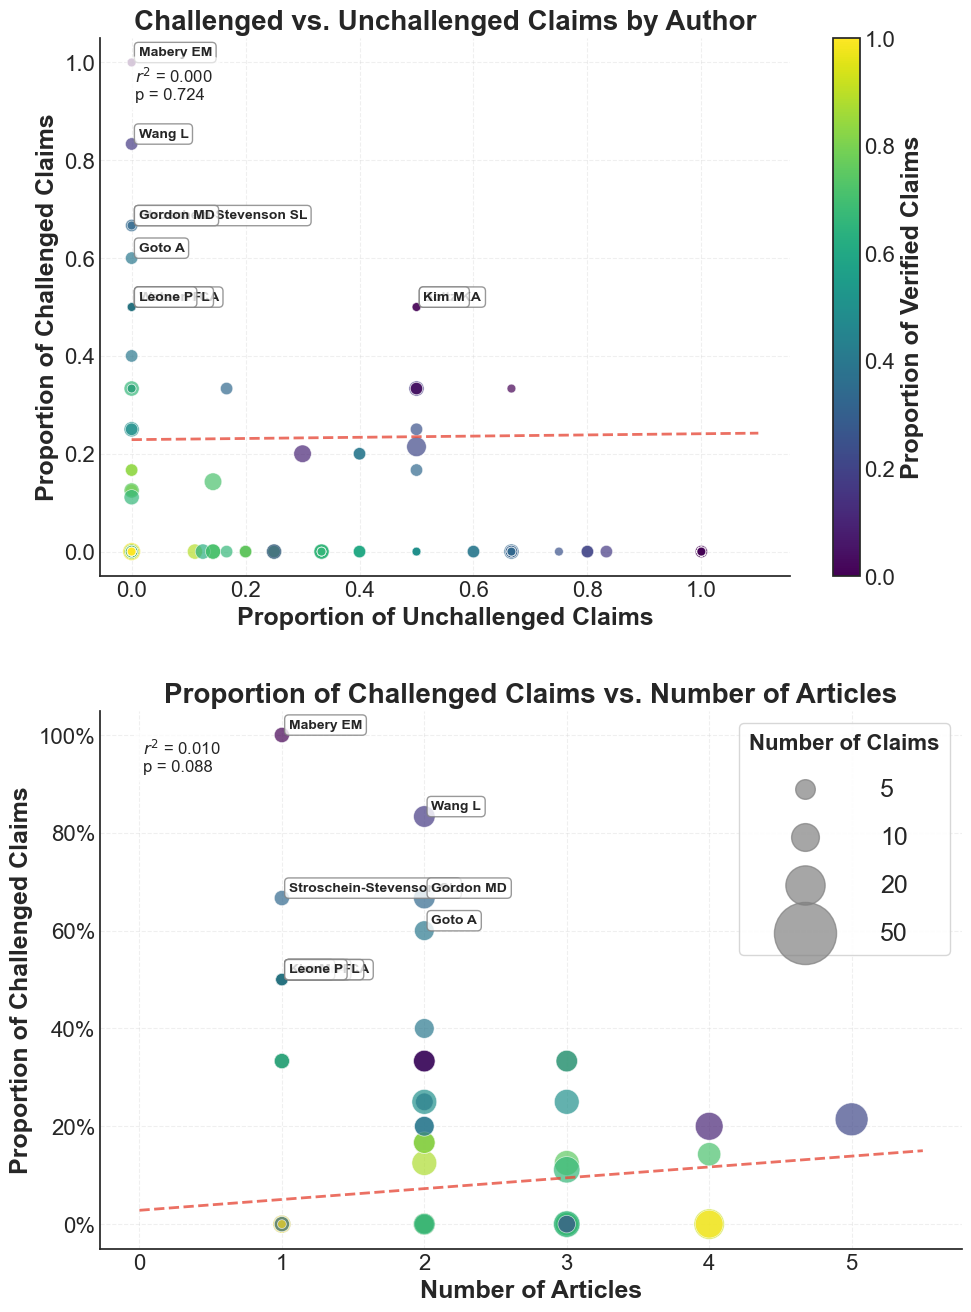

In [8]:
# Example usage for specialized author reproducibility plot:
fig = plot_info.create_author_reproducibility_scatter(
    to_plot,
    annotate_top_n=10
)

# Save examples:
plt.savefig(f'figures/fig4C_scatterA.png', dpi=300, bbox_inches='tight')
#plt.savefig('author_reproducibility.pdf', bbox_inches='tight')

/Users/chadi/Research/drosophila-reproducibility/plot_info.py:1366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


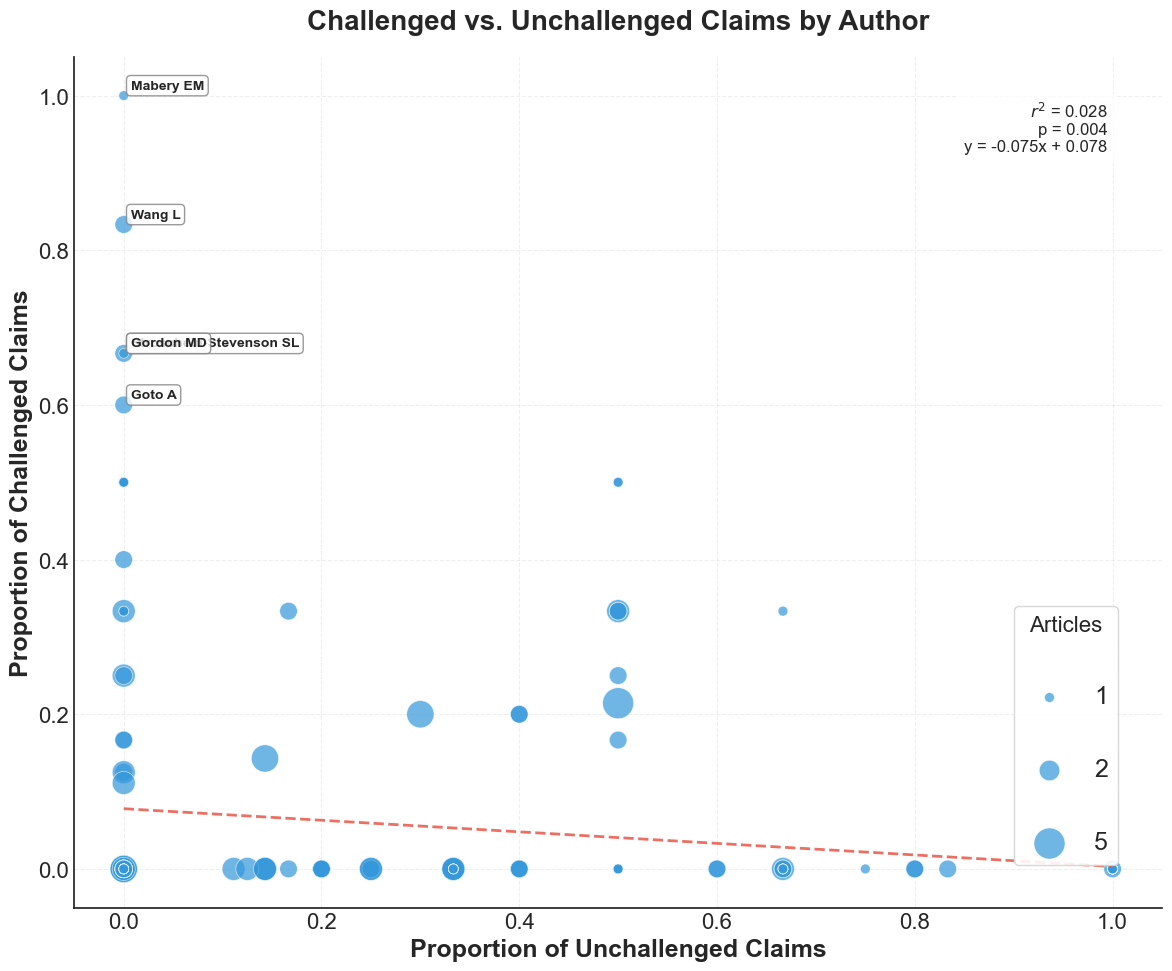

In [9]:
fig, ax = plot_info.create_publication_scatter(
    to_plot,
    x_var='Unchallenged prop', 
    y_var='Challenged prop',
    size_var='Articles', 
    title='Challenged vs. Unchallenged Claims by Author',
    x_label='Proportion of Unchallenged Claims',
    y_label='Proportion of Challenged Claims',
    annotate_top_n=5
)
#plt.savefig(f'figures/fig4C_scatterB', dpi=300, bbox_inches='tight')